# Notebook
Jorge Aragón Hernández

PID

Diciembre 2024

## Importar librerías y cargar dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv")


## Manejo de valores nulos y limpieza de datos

In [2]:
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['Year_of_Release'].fillna(df['Year_of_Release'].mode()[0], inplace=True)
df['Publisher'].fillna('Desconocido', inplace=True)
df['Developer'].fillna('Desconocido', inplace=True)
df['Rating'].fillna('Desconocido', inplace=True)
df[['Critic_Score', 'Critic_Count', 'User_Count']] = df[['Critic_Score', 'Critic_Count', 'User_Count']].fillna(0)

<ipython-input-2-563d8262f8d3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year_of_Release'].fillna(df['Year_of_Release'].mode()[0], inplace=True)
<ipython-input-2-563d8262f8d3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

## Análisis de datos

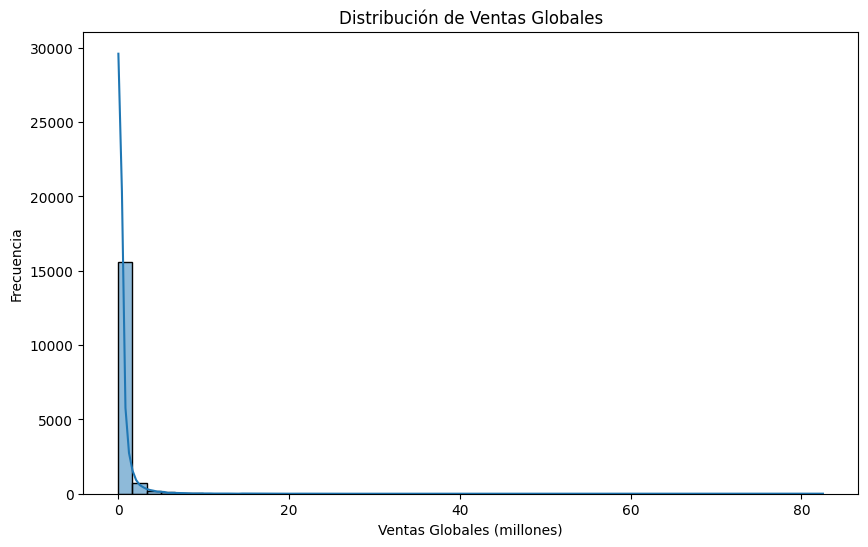

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=50, kde=True)
plt.title('Distribución de Ventas Globales')
plt.xlabel('Ventas Globales (millones)')
plt.ylabel('Frecuencia')
plt.show()

Ventas en diferentes regiones

<Figure size 1200x800 with 0 Axes>

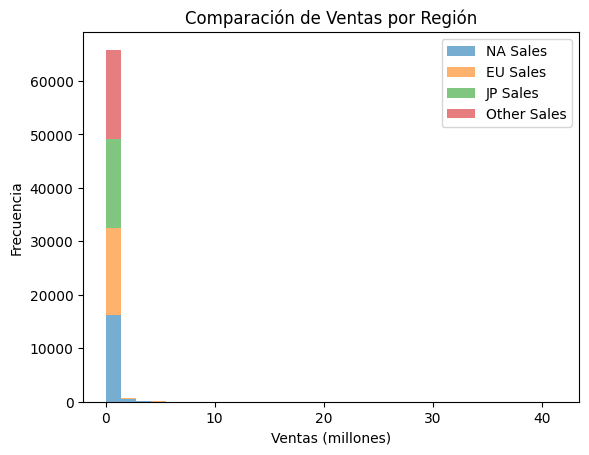

In [5]:
plt.figure(figsize=(12, 8))
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].plot.hist(bins=30, alpha=0.6, stacked=True)
plt.title('Comparación de Ventas por Región')
plt.xlabel('Ventas (millones)')
plt.ylabel('Frecuencia')
plt.legend(['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales'])
plt.show()

## Videojuego más vendido

In [7]:
most_sold_game = df.loc[df['Global_Sales'].idxmax()]
print(f"El videojuego más vendido es '{most_sold_game['Name']}' con {most_sold_game['Global_Sales']} millones de copias.")


El videojuego más vendido es 'Wii Sports' con 82.53 millones de copias.


## Región con más ventas

In [8]:
regional_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
best_region = regional_sales.idxmax()
print(f"La región con más ventas de videojuegos es {best_region} con {regional_sales.max()} millones de copias.")


La región con más ventas de videojuegos es NA_Sales con 4402.620000000001 millones de copias.


## Mapa de correlación

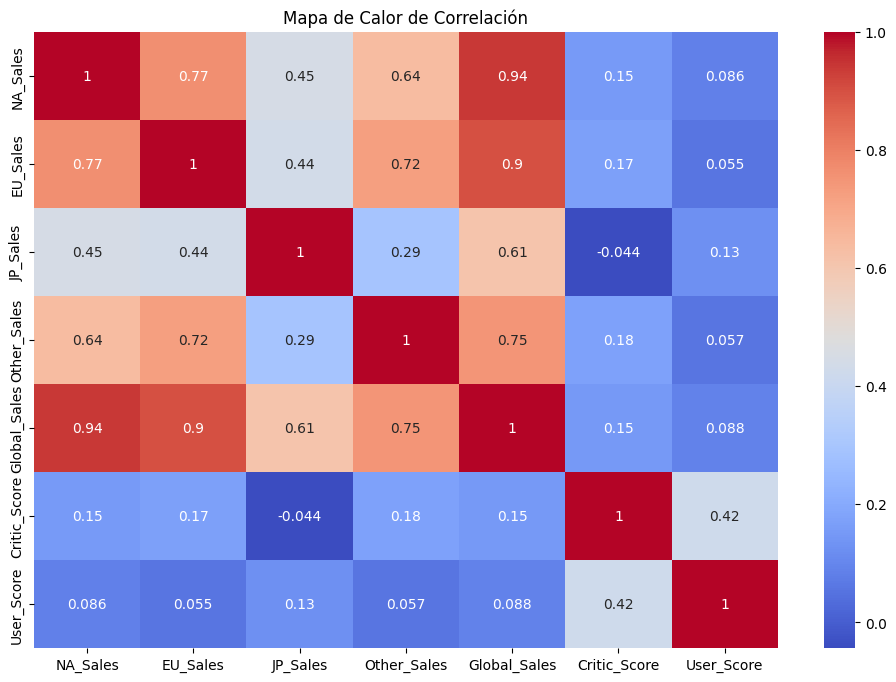

In [6]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'User_Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

## Conclusiones
Filas y columnas: 16,719 registros y 16 columnas.

Las columnas Critic_Score, Critic_Count, User_Score, User_Count, Developer y Rating tienen valores nulos.

El mapa de calor muestra las correlaciones entre:

Ventas regionales: NA_Sales, EU_Sales, JP_Sales y Other_Sales.
Ventas globales: Global_Sales.
Puntuaciones de crítica y usuario: Critic_Score y User_Score.

Las ventas en diferentes regiones (NA_Sales, EU_Sales, etc.) probablemente tienen una correlación positiva fuerte con Global_Sales. Esto significa que un videojuego exitoso en una región tiende a serlo también a nivel mundial.
La relación entre Critic_Score y User_Score con las ventas puede indicar si las calificaciones influyen en las ventas.



El análisis realizado, ofrece una visión general del comportamiento del mercado de videojuegos, ayudando a identificar patrones y tendencias que pueden ser útiles para futuros desarrollos o estrategias comerciales.